In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np
from collections import Counter
import seaborn as sns

#importing everything I may need

In [2]:
import io 
from google.colab import files as f 

#cool trick Alina used in one of her projects

In [ ]:
uploaded = f.upload() #function to load file from local computer 

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ALL.csv'])) #uploaded dataset 
df

In [ ]:
df.info

<bound method DataFrame.info of       Tran ID        DATE          ITEM   QTY                      PRODUCT  \
0     1045254  01/02/2020   SPFLRES10WG   2.0   FLASHING RESIN GRAY WINTER   
1     1044877  01/02/2020   SPFLRES10WG  15.0   FLASHING RESIN GRAY WINTER   
2     1044869  01/02/2020  SPFLRES10WWG   1.0  FLASHING RESIN WHITE WINTER   
3     1044866  01/02/2020  SPFLRES10WWG  25.0  FLASHING RESIN WHITE WINTER   
4     1043993  01/02/2020  SPFLRES10WWG   2.0  FLASHING RESIN WHITE WINTER   
...       ...         ...           ...   ...                          ...   
8750  1046321  12/30/2022  SPROOF20LGWG   1.0    ROOFING RESIN GRAY WINTER   
8751  1043508  12/30/2022   SPROOF20WWG   5.0   ROOFING RESIN WHITE WINTER   
8752  1046054  12/30/2022   SPROOF20WWG   2.0   ROOFING RESIN WHITE WINTER   
8753  1046024  12/30/2022   SPROOF20WWG   3.0   ROOFING RESIN WHITE WINTER   
8754  1045418  12/30/2022   SPROOF20WWG   2.0   ROOFING RESIN WHITE WINTER   

                            ADD

In [ ]:
df.head()

,Tran ID,DATE,ITEM,QTY,PRODUCT,ADDRESS,CITY
0,1045254,01/02/2020,SPFLRES10WG,2.0,FLASHING RESIN GRAY WINTER,art b,NaN
1,1044877,01/02/2020,SPFLRES10WG,15.0,FLASHING RESIN GRAY WINTER,1345 6th Avenue,New York
2,1044869,01/02/2020,SPFLRES10WWG,1.0,FLASHING RESIN WHITE WINTER,719 North Henry,NaN
3,1044866,01/02/2020,SPFLRES10WWG,25.0,FLASHING RESIN WHITE WINTER,Eagle One Roofing Contractors,Astoria
4,1043993,01/02/2020,SPFLRES10WWG,2.0,FLASHING RESIN WHITE WINTER,805 3rd ave,NaN


In [ ]:
df.tail()

,Tran ID,DATE,ITEM,QTY,PRODUCT,ADDRESS,CITY
8750,1046321,12/30/2022,SPROOF20LGWG,1.0,ROOFING RESIN GRAY WINTER,102-36 62nd Drive,Queens
8751,1043508,12/30/2022,SPROOF20WWG,5.0,ROOFING RESIN WHITE WINTER,730 5th Avenue,New York
8752,1046054,12/30/2022,SPROOF20WWG,2.0,ROOFING RESIN WHITE WINTER,730 5th Avenue,New York
8753,1046024,12/30/2022,SPROOF20WWG,3.0,ROOFING RESIN WHITE WINTER,27 West 23rd Street,New York
8754,1045418,12/30/2022,SPROOF20WWG,2.0,ROOFING RESIN WHITE WINTER,515 Blake Avenue,Brooklyn


In [ ]:
df.dtypes

Tran ID      int64
DATE        object
ITEM        object
QTY        float64
PRODUCT     object
ADDRESS     object
CITY        object
dtype: object

In [ ]:
df.isnull().sum()

Tran ID       0
DATE          0
ITEM          0
QTY           0
PRODUCT       0
ADDRESS       0
CITY       1380
dtype: int64

In [ ]:
df['PRODUCT'].value_counts()       # this counts the NUMBER of transactions, not a number of products sold. Each transaction may contain more than 1 product sold

FLASHING RESIN WHITE SUMMER    2909
FLASHING RESIN WHITE WINTER    2062
FLASHING RESIN GRAY SUMMER     1023
ROOFING RESIN WHITE SUMMER      915
FLASHING RESIN GRAY WINTER      705
ROOFING RESIN WHITE WINTER      683
ROOFING RESIN GRAY SUMMER       280
ROOFING RESIN GRAY WINTER       178
Name: PRODUCT, dtype: int64

In [ ]:
df.columns

Index(['Tran ID', 'DATE', 'ITEM', 'QTY', 'PRODUCT', 'ADDRESS', 'CITY'], dtype='object')

In [ ]:
drop_cols = ['ADDRESS', 'CITY']
df.drop(drop_cols, inplace = True, axis=1)

# dropping all columns I won't need     

In [ ]:
df

,Tran ID,DATE,ITEM,QTY,PRODUCT,ADDRESS,CITY
0,1045254,01/02/2020,SPFLRES10WG,2.0,FLASHING RESIN GRAY WINTER,art b,NaN
1,1044877,01/02/2020,SPFLRES10WG,15.0,FLASHING RESIN GRAY WINTER,1345 6th Avenue,New York
2,1044869,01/02/2020,SPFLRES10WWG,1.0,FLASHING RESIN WHITE WINTER,719 North Henry,NaN
3,1044866,01/02/2020,SPFLRES10WWG,25.0,FLASHING RESIN WHITE WINTER,Eagle One Roofing Contractors,Astoria
4,1043993,01/02/2020,SPFLRES10WWG,2.0,FLASHING RESIN WHITE WINTER,805 3rd ave,NaN
...,...,...,...,...,...,...,...
8750,1046321,12/30/2022,SPROOF20LGWG,1.0,ROOFING RESIN GRAY WINTER,102-36 62nd Drive,Queens
8751,1043508,12/30/2022,SPROOF20WWG,5.0,ROOFING RESIN WHITE WINTER,730 5th Avenue,New York
8752,1046054,12/30/2022,SPROOF20WWG,2.0,ROOFING RESIN WHITE WINTER,730 5th Avenue,New York
8753,1046024,12/30/2022,SPROOF20WWG,3.0,ROOFING RESIN WHITE WINTER,27 West 23rd Street,New York


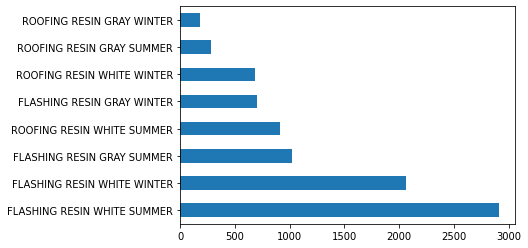

In [ ]:
df1=df['PRODUCT'].value_counts().nlargest(10).plot(kind='barh')   # this displays the NUMBER of transactions, not a number of products sold. Each transaction may contain more than 1 product sold
df1

In [ ]:
flashinggraywinter= df[df['PRODUCT'] == 'FLASHING RESIN GRAY WINTER']
flashinggraysummer= df[df['PRODUCT'] == 'FLASHING RESIN GRAY SUMMER']
flashingwhitewinter= df[df['PRODUCT'] == 'FLASHING RESIN WHITE WINTER']
flashingwhitesummer= df[df['PRODUCT'] == 'FLASHING RESIN WHITE SUMMER']


roofinggraysummer= df[df['PRODUCT'] == 'ROOFING RESIN GRAY SUMMER']
roofinggraywinter= df[df['PRODUCT'] == 'ROOFING RESIN GRAY WINTER']
roofingwhitesummer= df[df['PRODUCT'] == 'ROOFING RESIN WHITE SUMMER']
roofingwhitewinter= df[df['PRODUCT'] == 'ROOFING RESIN WHITE WINTER']

# how to use 'or' when creating a new dataset out of existing one?

In [ ]:
flashingall = pd.concat([flashinggraysummer, flashinggraywinter, flashingwhitewinter, flashingwhitesummer ], ignore_index=True)
roofingall = pd.concat([roofinggraysummer, roofinggraywinter, roofingwhitesummer, roofingwhitewinter], ignore_index=True)

In [ ]:
sumproductsall = df.groupby(['PRODUCT']).sum() 
sumproductsall

# I have quantities of sold buckets, but don't know how to use them in the charts

,Tran ID,QTY
PRODUCT,,
FLASHING RESIN GRAY SUMMER,1256260390,7756.0
FLASHING RESIN GRAY WINTER,842580807,4342.0
FLASHING RESIN WHITE SUMMER,3527744592,35584.0
FLASHING RESIN WHITE WINTER,2484693322,24196.0
ROOFING RESIN GRAY SUMMER,346924193,1576.0
ROOFING RESIN GRAY WINTER,209382022,1300.0
ROOFING RESIN WHITE SUMMER,1118982974,21844.0
ROOFING RESIN WHITE WINTER,813997269,12920.0


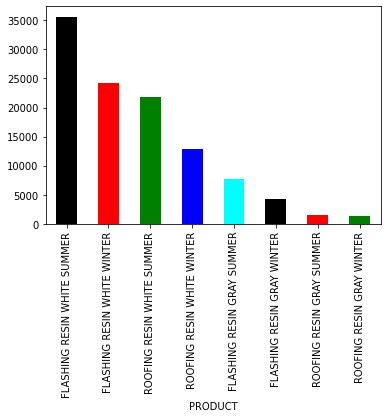

In [ ]:
df.groupby(['PRODUCT'])['QTY'].sum().sort_values(ascending=False).plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan']) 

# I finally used sum function to create the chart...
# how do I find out how many buckets were sold in each year (2020, 2021, 2022)? Do I have to split the date column?

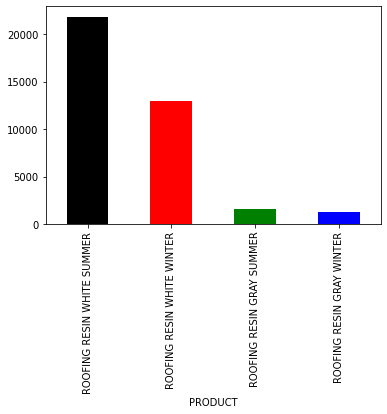

In [ ]:
roofingall.groupby(['PRODUCT'])['QTY'].sum().sort_values(ascending=False).plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan']) 

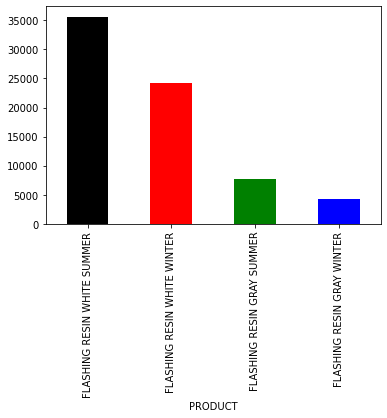

In [ ]:
flashingall.groupby(['PRODUCT'])['QTY'].sum().sort_values(ascending=False).plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan']) 

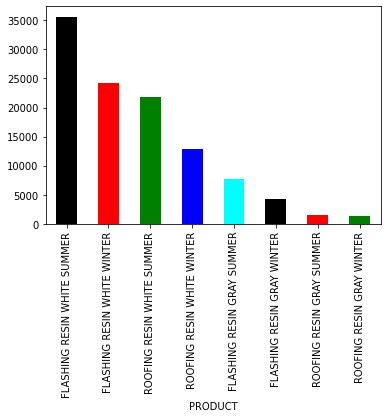

In [ ]:
sumproductsall.groupby(['PRODUCT'])['QTY'].sum().sort_values(ascending=False).plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan']) 